In [1]:
import numpy as np 
import pandas as pd

In [2]:
##reading data
pd.set_option('display.max_columns',None)
df=pd.read_csv("CSA.csv")
df.drop(columns=['Unnamed: 0' , 'Monthly_Inhand_Salary'],inplace=True)
df.head()

,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Monthly_Balance,Credit_Score
0,Scientist,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,Good,809.98,26.822620,265.0,No,High_spent_Small_value_payments,312.494089,Good
1,Scientist,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,4.0,Good,809.98,31.944960,266.0,No,Low_spent_Large_value_payments,284.629162,Good
2,Scientist,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,Good,809.98,28.609352,267.0,No,Low_spent_Medium_value_payments,331.209863,Good
3,Scientist,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,4.0,Good,809.98,31.377862,268.0,No,Low_spent_Small_value_payments,223.451310,Good
4,Scientist,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,4.0,Good,809.98,24.797347,269.0,No,High_spent_Medium_value_payments,341.489231,Good


In [3]:
df.describe()

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Monthly_Balance
count,91705.000000,91705.000000,91705.000000,91705.000000,91705.000000,91705.000000,91705.000000,91705.000000,91705.000000,91705.000000,91705.000000,91705.000000
mean,51336.698373,5.271316,5.470345,14.142751,3.422289,20.521433,13.060651,5.592639,1377.960125,32.321477,226.200087,398.043882
std,38777.382254,2.603067,2.049243,8.659878,2.424280,14.592800,6.248748,3.843010,1135.059058,5.125147,99.252323,204.164227
min,7006.035000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,1.000000,0.007760
25%,19627.930000,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,3.000000,544.970000,28.078939,152.000000,269.733071
50%,37655.980000,5.000000,5.000000,12.000000,3.000000,17.000000,13.000000,5.000000,1118.150000,32.350469,225.000000,337.855046
75%,73044.560000,7.000000,7.000000,20.000000,5.000000,27.000000,18.000000,8.000000,1814.780000,36.532614,308.000000,471.251754
max,179987.280000,11.000000,11.000000,34.000000,9.000000,62.000000,25.000000,17.000000,4998.070000,50.000000,404.000000,1183.930696


In [4]:
a1=df['Credit_Score'].unique()
a1

array(['Good', 'Standard', 'Poor'], dtype=object)

In [5]:
a2=df['Credit_Mix'].unique()
a2

array(['Good', 'Standard', 'Bad'], dtype=object)

In [6]:
a3=df['Payment_of_Min_Amount'].unique()
a3

array(['No', 'Yes'], dtype=object)

In [7]:
a4=df['Occupation'].unique()
a4

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [8]:
a5=df['Payment_Behaviour'].unique()
a5

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [9]:
df['Credit_Mix']=df['Credit_Mix'].map({'Good': 2 , 'Standard' : 1 , 'Bad' : 0})
df['Credit_Score']=df['Credit_Score'].map({'Good': 2 , 'Standard' : 1 , 'Poor' : 0})

## Label Encoding to treat Categorical data


In [10]:
##label encoding 

col1=['Payment_of_Min_Amount', 'Occupation' ,'Payment_Behaviour']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for c in col1:
    df[c]=le.fit_transform(df[c])

In [11]:
b1 = df['Credit_Score'].unique()
b2 = df['Credit_Mix'].unique()
b3 = df['Payment_of_Min_Amount'].unique()
b4 = df['Occupation'].unique()
b5 = df['Payment_Behaviour'].unique()

## Splitting Data

In [12]:
X=df[['Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Occupation' ,
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Monthly_Balance']].values
Y=df['Credit_Score'].values

## Apply oversampling

Data is Not 100% balanced

In [13]:
df['Credit_Score'].value_counts(normalize=True)

1    0.532894
0    0.278753
2    0.188354
Name: Credit_Score, dtype: float64

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
a = SMOTE(sampling_strategy='auto')

In [16]:
X_a , Y_a = a.fit_resample(X , Y)

In [17]:
pd.DataFrame(Y_a).value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
dtype: float64

##  Training  sets

In [18]:
X_train = X_a
Y_train = Y_a

## DecisionTreeClassifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import time

import gspread
from oauth2client.service_account import ServiceAccountCredentials

scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
account = ServiceAccountCredentials.from_json_keyfile_name("credit-score-analysis-c3637484635d3c2.json",scope)
access = gspread.authorize(account)

Project = access.open_by_url('https://docs.google.com/spreadsheets/d/10FsRFWWbRL8xoE9YwWx3Hwn3C8Sz0KE-BN0dPmBFFUs/edit#gid=0')     # MAIN SPREADSHEET

practo = Project.get_worksheet(0)

data = pd.DataFrame(practo.get_all_records())

In [21]:
# ## Occupation 

# l1 = ['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
#        'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
#        'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect']

# Occupation=[]
# for i in l1:
#     Occupation.append({"userEnteredValue" : i})
    

# sheetName = "Sheet1" # Sheet_Name.
# sheetId = Project.worksheet(sheetName).id # Extracting Sheet_ID
# body = {
#     "requests": [
#         {
#             "updateCells": {
#                 "range": {
#                     "sheetId": sheetId,
#                     "startRowIndex": 3,
#                     "endRowIndex": 4,
#                     "startColumnIndex": 2,
#                     "endColumnIndex": 3
#                 },
#                 "rows": [
#                     {
#                         "values": [
#                             {
#                                 "dataValidation": {
#                                     "condition": {
#                                         "values": Occupation,
#                                         "type": "ONE_OF_LIST"
#                                     },
#                                     "showCustomUi": True
#                                 }
#                             }
#                         ]
#                     }
#                 ],
#                 "fields": "dataValidation"
#             }
#         }
#     ]
#  }
# Project.batch_update(body)

In [22]:
# ## Credit_Mix 

# l2 = ['Good', 'Standard', 'Bad']

# Credit_Mix=[]
# for i in l2:
#     Credit_Mix.append({"userEnteredValue" : i})
    

# sheetName = "Sheet1" # Sheet_Name.
# sheetId = Project.worksheet(sheetName).id # Extracting Sheet_ID
# body = {
#     "requests": [
#         {
#             "updateCells": {
#                 "range": {
#                     "sheetId": sheetId,
#                     "startRowIndex": 12,
#                     "endRowIndex": 13,
#                     "startColumnIndex": 2,
#                     "endColumnIndex": 3
#                 },
#                 "rows": [
#                     {
#                         "values": [
#                             {
#                                 "dataValidation": {
#                                     "condition": {
#                                         "values": Credit_Mix,
#                                         "type": "ONE_OF_LIST"
#                                     },
#                                     "showCustomUi": True
#                                 }
#                             }
#                         ]
#                     }
#                 ],
#                 "fields": "dataValidation"
#             }
#         }
#     ]
#  }
# Project.batch_update(body)

In [23]:
# ## Payment_of_Min_Amount 

# l3 = ['No', 'Yes']

# Payment_of_Min_Amount=[]
# for i in l3:
#     Payment_of_Min_Amount.append({"userEnteredValue" : i})
    

# sheetName = "Sheet1" # Sheet_Name.
# sheetId = Project.worksheet(sheetName).id # Extracting Sheet_ID
# body = {
#     "requests": [
#         {
#             "updateCells": {
#                 "range": {
#                     "sheetId": sheetId,
#                     "startRowIndex": 16,
#                     "endRowIndex": 17,
#                     "startColumnIndex": 2,
#                     "endColumnIndex": 3
#                 },
#                 "rows": [
#                     {
#                         "values": [
#                             {
#                                 "dataValidation": {
#                                     "condition": {
#                                         "values": Payment_of_Min_Amount,
#                                         "type": "ONE_OF_LIST"
#                                     },
#                                     "showCustomUi": True
#                                 }
#                             }
#                         ]
#                     }
#                 ],
#                 "fields": "dataValidation"
#             }
#         }
#     ]
#  }
# Project.batch_update(body)

In [24]:
# ## Payment_Behaviour 

# l4 = ['High_spent_Small_value_payments',
#        'Low_spent_Large_value_payments',
#        'Low_spent_Medium_value_payments',
#        'Low_spent_Small_value_payments',
#        'High_spent_Medium_value_payments',
#        'High_spent_Large_value_payments']

# Payment_Behaviour=[]
# for i in l4:
#     Payment_Behaviour.append({"userEnteredValue" : i})
    

# sheetName = "Sheet1" # Sheet_Name.
# sheetId = Project.worksheet(sheetName).id # Extracting Sheet_ID
# body = {
#     "requests": [
#         {
#             "updateCells": {
#                 "range": {
#                     "sheetId": sheetId,
#                     "startRowIndex": 17,
#                     "endRowIndex": 18,
#                     "startColumnIndex": 2,
#                     "endColumnIndex": 3
#                 },
#                 "rows": [
#                     {
#                         "values": [
#                             {
#                                 "dataValidation": {
#                                     "condition": {
#                                         "values": Payment_Behaviour,
#                                         "type": "ONE_OF_LIST"
#                                     },
#                                     "showCustomUi": True
#                                 }
#                             }
#                         ]
#                     }
#                 ],
#                 "fields": "dataValidation"
#             }
#         }
#     ]
#  }
# Project.batch_update(body)

In [ ]:
while(True) :
    
    Occupation  = practo.acell('C4').value
    Annual_Income  = float(practo.acell('C5').value)
    Num_Bank_Accounts  = float(practo.acell('C6').value)
    Num_Credit_Card  = float(practo.acell('C7').value)
    Interest_Rate  = float(practo.acell('C8').value)
    Num_of_Loan = float(practo.acell('C9').value)
    Delay_from_due_date  = float(practo.acell('C10').value)
    Num_of_Delayed_Payment  = float(practo.acell('C11').value)
    Num_Credit_Inquiries  = float(practo.acell('C12').value)
    Credit_Mix  = practo.acell('C13').value
    Outstanding_Debt  = float(practo.acell('C14').value)
    Credit_Utilization_Ratio  = float(practo.acell('C15').value)
    Credit_History_Age  = float(practo.acell('C16').value)
    Payment_of_Min_Amount  = practo.acell('C17').value
    Payment_Behaviour  = practo.acell('C18').value
    Monthly_Balance  = float(practo.acell('C19').value)
    

    my_dict = {'Occupation' : Occupation , 'Annual_Income' : Annual_Income , 'Num_Bank_Accounts' : Num_Bank_Accounts ,
               'Num_Credit_Card' : Num_Credit_Card , 'Interest_Rate' : Interest_Rate , 'Num_of_Loan' : Num_of_Loan , 
               'Delay_from_due_date' : Delay_from_due_date , 'Num_of_Delayed_Payment' : Num_of_Delayed_Payment , 
               'Num_Credit_Inquiries' : Num_Credit_Inquiries , 'Credit_Mix' : Credit_Mix , 'Outstanding_Debt' : Outstanding_Debt,
               'Credit_Utilization_Ratio' : Credit_Utilization_Ratio , 'Credit_History_Age' : Credit_History_Age ,
               'Payment_of_Min_Amount' : Payment_of_Min_Amount , 'Payment_Behaviour' : Payment_Behaviour ,
               'Monthly_Balance' : Monthly_Balance}
    df4 = pd.DataFrame([my_dict])

#     print(df4)

    w1=a4.tolist()
    w2=w1.index(Occupation)
    w3=b4.tolist()
    w4=w3[w2]
    df4['Occupation'][0]=w4

    e1=a2.tolist()
    e2=e1.index(Credit_Mix)
    e3=b2.tolist()
    e4=e3[e2]
    df4['Credit_Mix'][0]=e4

    f1=a3.tolist()
    f2=f1.index(Payment_of_Min_Amount)
    f3=b3.tolist()
    f4=f3[f2]
    df4['Payment_of_Min_Amount'][0]=f4
    
    p1=a5.tolist()
    p2=p1.index(Payment_Behaviour)
    p3=b5.tolist()
    p4=p3[p2]
    df4['Payment_Behaviour'][0]=p4
    
    

    col=['Occupation','Credit_Mix','Payment_of_Min_Amount' , 'Payment_Behaviour']
    for i in col:
        df4[i] = pd.to_numeric(df4[i])

    X_test=df4[['Occupation', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Monthly_Balance']]
    Y_pred=dc.predict(X_test)
    q = Y_pred[0]
    d = a1.tolist()
    c = d[q]
    practo.update('C21', c)
    time.sleep(15)
    

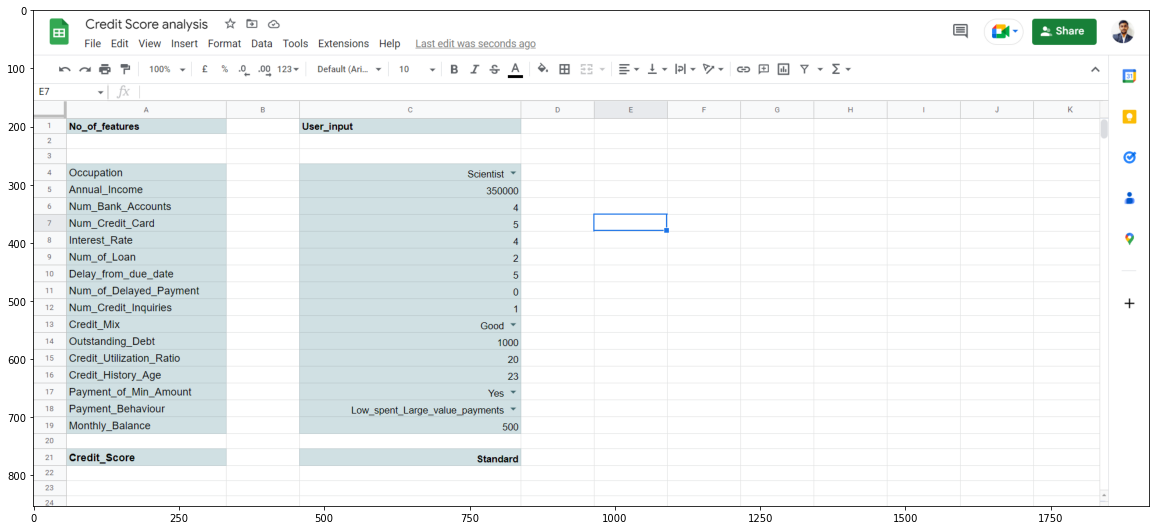

In [15]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
# Read Images
img = mpimg.imread('Screenshot 2023-02-20 163614.png')
 
# Output Images
plt.imshow(img)